# Coursera Capstone Project
**By Amir Musallam** 

# 1. Introduction

## 1.1. Background

Chicago is the most populous city in the U.S. state of Illinois, and the third-most-populous city in the United States.
Being an metropolitan city, Chicago is also home to many restaurants which serves wide variety of cuisines. Owing to significant number of Indian expatriate population, Chicago and its nearby Suburbs have quite a few Indian restaurant.

This project will focus on Indian restaurants in Chicago which will be analyzed and rated using FourSquare.

## 1.2. Problem Description

By utilizing the Chicago restaurants inspection data, Indian Restaurants in Chicago and their risk category will be Analyzed. using the FourSquare API we will get the ratings of Indian Restaurants in Chicago.

## 1.3. Target Audience
* Market Analysis for Indian Food
* Competitive Analysis
* Food reviewers 

# 2. Data

For this project we will use the following data :

1. Chicago restaurant inspection data from 2010-2020

*  Data source : https://data.cityofchicago.org/api/views/4ijn-s7e5/rows.csv?accessType=DOWNLOAD

*  Description : This data set contains 137,907 rows and 17 columns with Restaurant Name, Street Name, violation descriptions along with their latitude and longitude. This data will be downloaded and used.

2. Ratings of Indian restaurants for selected locality in Chicago
* Data source : Fousquare API

*  Description : By using this api we will get all the ratings for Indian restaurants in selected neighborhood

# 3.Methodology

1. Collect the Chicago Restaurants Inspection data from https://data.cityofchicago.org/api/views/4ijn-s7e5/rows.csv?accessType=DOWNLOAD
2. Analyze the restaurants based on their risk category
3. Filter out all venues from the inspection data that are Indian restaurants.
4. Visualize the Indian Restaurants using folium library(python)
5. Find rating , tips and like count for each Indian restaurants using FourSquare API.

# 4. Data Processing

In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


# import plotting libraries
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

# import modelling libraries
from sklearn import *
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# import mapping rendering library
import folium 
# import JSON file handling library 
import json
# import Requests Handler library
import requests
# import geocoding libraries
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim
# import package and its set of stopwords
!conda install -c conda-forge wordcloud --yes
from wordcloud import WordCloud, STOPWORDS

# import k-means from clustering stage
from sklearn.cluster import KMeans

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    olefile-0.46               |             py_0          31 KB  conda-forge
    pillow-7.1.2               |   py36h8328e55_0         656 KB  conda-forge
    wordcloud-1.7.0            |   py36h8c4c3a4_0         190 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         877 KB

The following NEW packages will be INSTALLED:

  olefile            conda-forge/noarch::olefile-0.46-py_0
  pillow             conda-forge/linux-64::pillow-7.1.2-py36h8328e55_0
  wordcloud          conda-forge/linux-64::wordcloud-1.7.0-py36h8c4c3a4_0



wordcloud-1.7.0

In [3]:
# Load the restaurant inspection data into dataframe 

chicago_df = pd.read_csv("Food_Inspections.csv")
chicago_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2373301,SWEETGREEN,SWEETGREEN,2732686,Restaurant,Risk 1 (High),1471 N MILWAUKEE AVE,CHICAGO,IL,60622.0,6/4/2020,License,Not Ready,NaN,41.908726,-87.674661,"(-87.67466083943248, 41.90872609383611)"
1,2373289,"CHICAGO SHARK FISH, INC","CHICAGO SHARK FISH, INC",2483042,Restaurant,Risk 2 (Medium),9800 S HALSTED ST,CHICAGO,IL,60628.0,5/29/2020,Canvass,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,41.715870,-87.643210,"(-87.64321013954779, 41.71587020321599)"
2,2373247,LIVE BETTER/VIVE MEJOR,LIVE BETTER/ VIVE MEJOR,2595557,Restaurant,Risk 2 (Medium),5935 W 63RD ST,CHICAGO,IL,60638.0,5/29/2020,Canvass Re-Inspection,Pass,NaN,41.777772,-87.770487,"(-87.77048696136391, 41.777771632322505)"
3,2373225,POPEYES,POPEYES,2578260,Restaurant,Risk 2 (Medium),11350 S HALSTED ST,CHICAGO,IL,60628.0,5/28/2020,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.687217,-87.642365,"(-87.6423646216907, 41.687216927276424)"
4,2371209,NICKY'S GRILL & YOGURT OASIS,NICKY'S GRILL & YOGURT OASIS,59480,Restaurant,Risk 1 (High),10255 S WESTERN AVE,CHICAGO,IL,60643.0,5/28/2020,Canvass Re-Inspection,Pass,NaN,41.706583,-87.681481,"(-87.68148089347167, 41.70658293299433)"


In [4]:
# Check datatypes of columns present in the above dataframe

chicago_df.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #            int64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

In [6]:
# Get the Column Names

chicago_df.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [13]:
# Check the shape of the modified dataframe

chicago_df.shape

(137907, 17)

In [14]:
# Drop columns that have null values

chicago_df.dropna(axis=0, how='any', inplace=True)
chicago_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2373289,"CHICAGO SHARK FISH, INC","CHICAGO SHARK FISH, INC",2483042,Restaurant,Risk 2 (Medium),9800 S HALSTED ST,CHICAGO,IL,60628.0,5/29/2020,Canvass,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,41.715870,-87.643210,"(-87.64321013954779, 41.71587020321599)"
3,2373225,POPEYES,POPEYES,2578260,Restaurant,Risk 2 (Medium),11350 S HALSTED ST,CHICAGO,IL,60628.0,5/28/2020,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.687217,-87.642365,"(-87.6423646216907, 41.687216927276424)"
8,2371064,The Art Of Pizza Inc,The Art Of Pizza,20873,Restaurant,Risk 1 (High),3033 N ASHLAND AVE,CHICAGO,IL,60657.0,5/26/2020,Complaint,Pass,40. PERSONAL CLEANLINESS - Comments: OBSERVED ...,41.937006,-87.668419,"(-87.6684186143436, 41.9370063630277)"
12,2370956,CHURCH'S CHICKEN # 483,CHURCH'S CHICKEN # 483,1273261,Restaurant,Risk 2 (Medium),1755 W JACKSON BLVD,CHICAGO,IL,60612.0,5/21/2020,Canvass,Pass w/ Conditions,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.877439,-87.671354,"(-87.6713535675008, 41.87743900462169)"
14,2370931,"BIG WIG 0003, LLC",BIG WIG TACOS,2703973,Restaurant,Risk 1 (High),2490 N MILWAUKEE AVE,CHICAGO,IL,60647.0,5/21/2020,License,Pass,52. SEWAGE & WASTE WATER PROPERLY DISPOSED - C...,41.926526,-87.703484,"(-87.70348437837019, 41.926525863659975)"


In [15]:
# Check the dataframe shape

chicago_df.shape

(103495, 17)

In [21]:
# Get the information about the modified dataframe

chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103495 entries, 1 to 137906
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    103495 non-null  int64  
 1   DBA Name         103495 non-null  object 
 2   AKA Name         103495 non-null  object 
 3   License #        103495 non-null  int64  
 4   Facility Type    103495 non-null  object 
 5   Risk             103495 non-null  object 
 6   Address          103495 non-null  object 
 7   City             103495 non-null  object 
 8   State            103495 non-null  object 
 9   Zip              103495 non-null  float64
 10  Inspection Date  103495 non-null  object 
 11  Inspection Type  103495 non-null  object 
 12  Results          103495 non-null  object 
 13  Violations       103495 non-null  object 
 14  Latitude         103495 non-null  float64
 15  Longitude        103495 non-null  float64
 16  Location         103495 non-null  obje

Since, we have now loaded the dataframe now lets clean the datframe and do some type conversions for ease of processing

## 3.1. Data Cleaning

Convert Inspection Date column to datetime variable 

In [24]:
chicago_df['Inspection Date'] = pd.to_datetime(chicago_df['Inspection Date'])
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103495 entries, 1 to 137906
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Inspection ID    103495 non-null  int64         
 1   DBA Name         103495 non-null  object        
 2   AKA Name         103495 non-null  object        
 3   License #        103495 non-null  int64         
 4   Facility Type    103495 non-null  object        
 5   Risk             103495 non-null  object        
 6   Address          103495 non-null  object        
 7   City             103495 non-null  object        
 8   State            103495 non-null  object        
 9   Zip              103495 non-null  float64       
 10  Inspection Date  103495 non-null  datetime64[ns]
 11  Inspection Type  103495 non-null  object        
 12  Results          103495 non-null  object        
 13  Violations       103495 non-null  object        
 14  Latitude         103

Let us now check how many unique zip codes are present

In [26]:
chicago_df['Zip'].unique()

array([60628., 60657., 60612., 60647., 60622., 60614., 60609., 60640.,
       60629., 60626., 60645., 60655., 60654., 60656., 60660., 60646.,
       60638., 60615., 60641., 60607., 60642., 60620., 60651., 60610.,
       60616., 60611., 60619., 60603., 60617., 60625., 60601., 60659.,
       60644., 60606., 60653., 60661., 60649., 60636., 60666., 60602.,
       60643., 60634., 60618., 60630., 60608., 60707., 60621., 60605.,
       60632., 60639., 60631., 60624., 60613., 60604., 60623., 60652.,
       60637., 60633., 60827.])

Convert Zip Code to integer data type

In [27]:
chicago_df = chicago_df.astype({'Zip':'int64'})
chicago_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103495 entries, 1 to 137906
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Inspection ID    103495 non-null  int64         
 1   DBA Name         103495 non-null  object        
 2   AKA Name         103495 non-null  object        
 3   License #        103495 non-null  int64         
 4   Facility Type    103495 non-null  object        
 5   Risk             103495 non-null  object        
 6   Address          103495 non-null  object        
 7   City             103495 non-null  object        
 8   State            103495 non-null  object        
 9   Zip              103495 non-null  int64         
 10  Inspection Date  103495 non-null  datetime64[ns]
 11  Inspection Type  103495 non-null  object        
 12  Results          103495 non-null  object        
 13  Violations       103495 non-null  object        
 14  Latitude         103

Check the dataframe shape after these processing

In [28]:
chicago_df.shape

(103495, 17)

# 5. Data Visulaization

Let's group the restaurants on the basis of risk score

In [30]:
df_risk = chicago_df.groupby('Risk', axis=0).count()
df_risk.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
Risk,,,,,,,,,,,,,,,,
Risk 1 (High),84765,84765,84765,84765,84765,84765,84765,84765,84765,84765,84765,84765,84765,84765,84765,84765
Risk 2 (Medium),18235,18235,18235,18235,18235,18235,18235,18235,18235,18235,18235,18235,18235,18235,18235,18235
Risk 3 (Low),495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495


Now let us visualize the above dataframe in the form of a pie chart

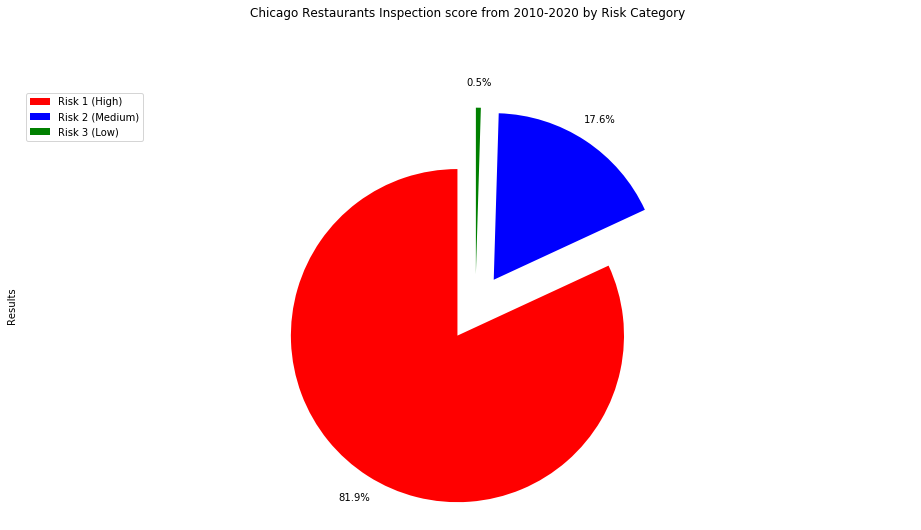

In [237]:
colors_list = ['red', 'blue', 'green']
explode_list = [0.2, 0.2, 0.2] # ratio for offsetting each wedge.

df_risk['Results'].plot(kind='pie',
                            figsize=(16, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list 
                            )

plt.title('Chicago Restaurants Inspection score from 2010-2020 by Risk Category', y=1.15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_risk.index, loc='upper left') 

plt.show()

As it can be seen from the above pie chart that majority of (~81%) are high risk categories. This shows either the Chicago officials are very strict or the restaurants maintain a very low standard!!.

Now let's visualize how many number of restaurants are in each risk category from 2010-2020

Text(0.5, 0, 'Risk')

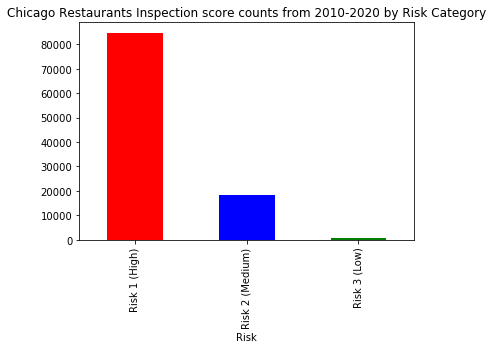

In [233]:
df_risk['Results'].plot.bar(color = colors_list)

plt.title('Chicago Restaurants Inspection score counts from 2010-2020 by Risk Category')

plt.xlabel("Risk")

A bit more detail on the counts

In [41]:
chicago_df['Risk'].value_counts()

Risk 1 (High)      84765
Risk 2 (Medium)    18235
Risk 3 (Low)         495
Name: Risk, dtype: int64

Let us group the Restaurants on the basis of Risk and Inspection Year using Inspection Score to get year-wise details.

In [44]:
dl_df_year = chicago_df.groupby(['Risk',chicago_df["Inspection Date"].dt.year])['Results'].count()
dl_df_year.head(30)

Risk             Inspection Date
Risk 1 (High)    2010                6116
                 2011                6502
                 2012                6820
                 2013                8120
                 2014                9718
                 2015                8874
                 2016               10275
                 2017                9532
                 2018                7624
                 2019                8576
                 2020                2608
Risk 2 (Medium)  2010                1738
                 2011                1887
                 2012                1679
                 2013                1942
                 2014                1936
                 2015                1928
                 2016                2095
                 2017                1724
                 2018                1285
                 2019                1449
                 2020                 572
Risk 3 (Low)     2010                  80
 

In [45]:
un_dl_df = dl_df_year.unstack()

In [46]:
df_all_year = un_dl_df.T
df_all_year

Risk,Risk 1 (High),Risk 2 (Medium),Risk 3 (Low)
Inspection Date,,,
2010,6116,1738,80
2011,6502,1887,51
2012,6820,1679,43
2013,8120,1942,55
2014,9718,1936,55
2015,8874,1928,44
2016,10275,2095,53
2017,9532,1724,43
2018,7624,1285,28


Now let's visualize how much percentage of restaurants are in each risk category in each year from 2010-2020

In [52]:
chicago_df.groupby(chicago_df["Inspection Date"].dt.year)['Risk'].value_counts(normalize=True)

Inspection Date  Risk           
2010             Risk 1 (High)      0.770860
                 Risk 2 (Medium)    0.219057
                 Risk 3 (Low)       0.010083
2011             Risk 1 (High)      0.770379
                 Risk 2 (Medium)    0.223578
                 Risk 3 (Low)       0.006043
2012             Risk 1 (High)      0.798408
                 Risk 2 (Medium)    0.196558
                 Risk 3 (Low)       0.005034
2013             Risk 1 (High)      0.802609
                 Risk 2 (Medium)    0.191954
                 Risk 3 (Low)       0.005436
2014             Risk 1 (High)      0.829960
                 Risk 2 (Medium)    0.165343
                 Risk 3 (Low)       0.004697
2015             Risk 1 (High)      0.818182
                 Risk 2 (Medium)    0.177761
                 Risk 3 (Low)       0.004057
2016             Risk 1 (High)      0.827095
                 Risk 2 (Medium)    0.168639
                 Risk 3 (Low)       0.004266
2017             Risk 

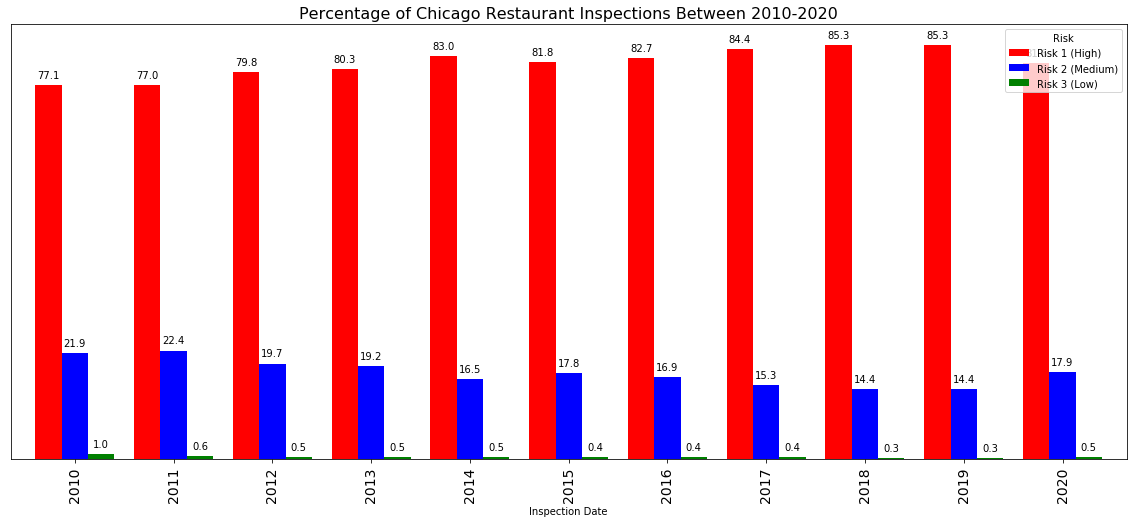

In [235]:
# Convert the numbers into percentages of the total number of respondents.

df_risk_percent = df_all_year.div(df_all_year.sum(1), axis=0).round(3)*100
#df_risk_percent = ((df_all_year / 36093) * 100).round(2)

# Create the plot
ax = df_risk_percent.plot(kind='bar',
                       figsize = (20, 8),
                       width = 0.8,
                       color = ['r', 'b', 'g'],
                       fontsize = 14)

# Add title to the plot
plt.title('Percentage of Chicago Restaurant Inspections Between 2010-2020', fontsize=16)

# See link https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color/23907866
ax.set_facecolor((1.0, 1.0, 1.0))

# See link https://stackoverflow.com/questions/40705614/hide-axis-label-only-not-entire-axis-in-pandas-plot
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

# See link https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
for p in ax.patches:                 
    ax.annotate(np.round(p.get_height(),decimals=2),                             
                (p.get_x()+p.get_width()/2., p.get_height()),                              
                ha='center',                              
                va='center',                              
                xytext=(0, 10),                               
                textcoords='offset points')
    
plt.show()

Most common name for Indian restaurants based on a google search

In [107]:
indian_score = chicago_df.loc[(chicago_df['DBA Name'].str.contains('SHIVA')) | 
                                    (chicago_df['DBA Name'].str.contains('INDIA')) | 
                                    (chicago_df['DBA Name'].str.contains('MASALA'))|
                                    (chicago_df['DBA Name'].str.contains('SPICE IN THE CITY'))|
                                    (chicago_df['DBA Name'].str.contains('MUMBAI'))|
                                    (chicago_df['DBA Name'].str.contains('MEERUT'))|
                                    (chicago_df['DBA Name'].str.contains('8 CLOVES'))|
                                    (chicago_df['DBA Name'].str.contains('KALACHAND'))|
                                    (chicago_df['DBA Name'].str.contains('CURRY'))|
                                    (chicago_df['DBA Name'].str.contains('SAFFRON HOUSE'))|
                                    (chicago_df['DBA Name'].str.contains('SOUTHERN SPICE'))|
                                    (chicago_df['DBA Name'].str.contains('SWADESHI'))|
                                    (chicago_df['DBA Name'].str.contains('KESARI'))|
                                    (chicago_df['DBA Name'].str.contains('CURRY'))]
indian_score

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Day of Week
2316,2279721,KAYBEE'S INDIAN FLAVOR,KAYBEE'S INDIAN FLAVOR,2609668,Restaurant,Risk 1 (High),1234 N HALSTED ST,CHICAGO,IL,60642,2019-03-20,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.904502,-87.648267,"(-87.64826686780404, 41.90450210717989)",2
11102,1199413,POPEYES CHICKEN/INDIAN SWAAD,POPEYES CHICKEN/INDIAN SWAAD,40155,Restaurant,Risk 1 (High),500 W MADISON ST,CHICAGO,IL,60661,2014-07-10,Complaint,Fail,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.881994,-87.639759,"(-87.6397586848809, 41.88199433820508)",3
11298,1473404,INDIA HOUSE,INDIA HOUSE,1379248,Restaurant,Risk 1 (High),59 W GRAND AVE,CHICAGO,IL,60654,2014-06-05,Canvass,Pass w/ Conditions,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.891528,-87.630342,"(-87.63034188036501, 41.891527574142366)",3
11745,1391460,THE LITTLE INDIA,THE LITTLE INDIA,1892841,Restaurant,Risk 1 (High),1109 W BRYN MAWR AVE,CHICAGO,IL,60660,2014-03-12,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.983543,-87.658429,"(-87.65842914502518, 41.983542609997954)",2
14344,1106666,VICEROY OF INDIA/ SAGAR,VICEROY OF INDIA/SAGAR,2125167,Restaurant,Risk 1 (High),2516-2520 W DEVON AVE,CHICAGO,IL,60659,2013-07-08,Canvass Re-Inspection,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.997785,-87.693063,"(-87.69306266413626, 41.997784946537436)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135563,160245,ZAIQA INDIAN RESTAURANT,ZAIQA INDIAN RESTAURANT,40975,Restaurant,Risk 1 (High),858 N ORLEANS ST,CHICAGO,IL,60610,2010-02-02,Canvass,Pass w/ Conditions,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.898198,-87.637380,"(-87.63738015364876, 41.898198096788455)",1
135647,112376,CHICAGO CURRY HOUSE,CHICAGO CURRY HOUSE,1909035,Restaurant,Risk 1 (High),899 S PLYMOUTH CT,CHICAGO,IL,60605,2010-04-12,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.870573,-87.628448,"(-87.62844790993732, 41.87057299287796)",0
136950,215283,INDIANA'S SNACK SHOP,INDIANA'S SNACK SHOP,2026604,Restaurant,Risk 1 (High),203 E 71ST ST,CHICAGO,IL,60619,2010-03-30,License,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.765506,-87.619927,"(-87.61992725732212, 41.7655056685417)",1
137402,88347,THE LITTLE INDIA,THE LITTLE INDIA,1892841,Restaurant,Risk 1 (High),1109 W BRYN MAWR AVE,CHICAGO,IL,60660,2010-04-20,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.983543,-87.658429,"(-87.65842914502518, 41.983542609997954)",1


In [109]:
indian_rest_df = pd.DataFrame(indian_score)
indian_rest_df.reset_index(drop=True, inplace=True)
indian_rest_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Day of Week
0,2279721,KAYBEE'S INDIAN FLAVOR,KAYBEE'S INDIAN FLAVOR,2609668,Restaurant,Risk 1 (High),1234 N HALSTED ST,CHICAGO,IL,60642,2019-03-20,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.904502,-87.648267,"(-87.64826686780404, 41.90450210717989)",2
1,1199413,POPEYES CHICKEN/INDIAN SWAAD,POPEYES CHICKEN/INDIAN SWAAD,40155,Restaurant,Risk 1 (High),500 W MADISON ST,CHICAGO,IL,60661,2014-07-10,Complaint,Fail,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.881994,-87.639759,"(-87.6397586848809, 41.88199433820508)",3
2,1473404,INDIA HOUSE,INDIA HOUSE,1379248,Restaurant,Risk 1 (High),59 W GRAND AVE,CHICAGO,IL,60654,2014-06-05,Canvass,Pass w/ Conditions,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.891528,-87.630342,"(-87.63034188036501, 41.891527574142366)",3
3,1391460,THE LITTLE INDIA,THE LITTLE INDIA,1892841,Restaurant,Risk 1 (High),1109 W BRYN MAWR AVE,CHICAGO,IL,60660,2014-03-12,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.983543,-87.658429,"(-87.65842914502518, 41.983542609997954)",2
4,1106666,VICEROY OF INDIA/ SAGAR,VICEROY OF INDIA/SAGAR,2125167,Restaurant,Risk 1 (High),2516-2520 W DEVON AVE,CHICAGO,IL,60659,2013-07-08,Canvass Re-Inspection,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.997785,-87.693063,"(-87.69306266413626, 41.997784946537436)",0


In [110]:
indian_rest_df.shape

(227, 18)

So there are 227 entries from our search. However, those are all not unique as they contain inspection details from 2010-2020 for the same restaurants.

Let us group the above results based on restaurant name, risk and the Results

In [111]:
indian_year = indian_rest_df.groupby(['DBA Name','Risk','Inspection Date'])['Results'].count()
indian_year.head(100)

DBA Name                Risk           Inspection Date
5 STAR INDIA            Risk 1 (High)  2018-01-31         1
                                       2018-02-07         1
CHAPATI INDIAN GRILL    Risk 1 (High)  2016-04-22         1
                                       2016-10-13         1
                                       2017-07-27         1
                                                         ..
INDIANA'S SNACK SHOP    Risk 1 (High)  2010-03-30         1
KAYBEE'S INDIAN FLAVOR  Risk 1 (High)  2018-07-30         1
                                       2018-07-31         1
                                       2019-03-20         1
MASALA                  Risk 1 (High)  2010-11-24         1
Name: Results, Length: 100, dtype: int64

In [112]:
df_indian_risk = indian_year.groupby('Risk', axis=0).count()
df_indian_risk.head()

Risk
Risk 1 (High)      219
Risk 2 (Medium)      7
Name: Results, dtype: int64

From 2010-2020 the majority of the Indian restaurants are in the 'High risk' category

Let us now visulize the above numbers in percentage to compare

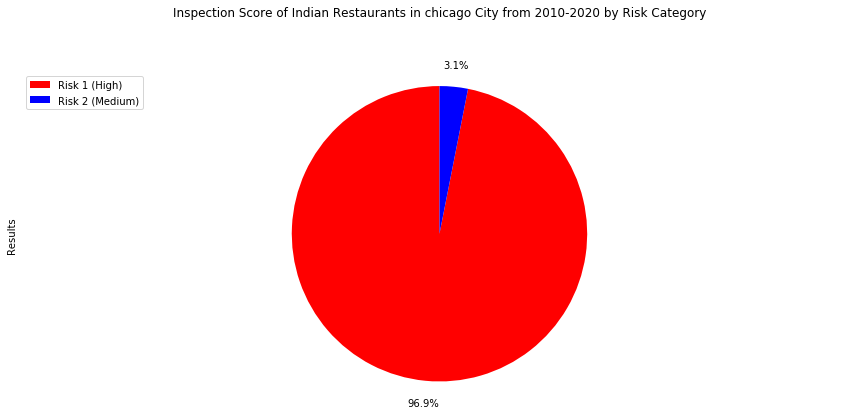

<Figure size 432x288 with 0 Axes>

In [236]:
colors_list = ['red', 'blue']

df_indian_risk.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list  # add custom colors
                            )

# scale the title up by 12% to match pctdistance
plt.title('Inspection Score of Indian Restaurants in Chicago from 2010-2020 by Risk Category', y=1.15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_risk.index, loc='upper left') 

plt.show()

plt.savefig("Indian_Restaurants_pie.png")

In [116]:
#start of word cloud visiualization

indian_violation = chicago_df.loc[(chicago_df['DBA Name'].str.contains('SHIVA')) | 
                                    (chicago_df['DBA Name'].str.contains('INDIA')) | 
                                    (chicago_df['DBA Name'].str.contains('MASALA'))|
                                    (chicago_df['DBA Name'].str.contains('SPICE IN THE CITY'))|
                                    (chicago_df['DBA Name'].str.contains('MUMBAI'))|
                                    (chicago_df['DBA Name'].str.contains('MEERUT'))|
                                    (chicago_df['DBA Name'].str.contains('8 CLOVES'))|
                                    (chicago_df['DBA Name'].str.contains('KALACHAND'))|
                                    (chicago_df['DBA Name'].str.contains('CURRY'))|
                                    (chicago_df['DBA Name'].str.contains('SAFFRON HOUSE'))|
                                    (chicago_df['DBA Name'].str.contains('SOUTHERN SPICE'))|
                                    (chicago_df['DBA Name'].str.contains('SWADESHI'))|
                                    (chicago_df['DBA Name'].str.contains('KESARI'))]
indian_violation.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Day of Week
2316,2279721,KAYBEE'S INDIAN FLAVOR,KAYBEE'S INDIAN FLAVOR,2609668,Restaurant,Risk 1 (High),1234 N HALSTED ST,CHICAGO,IL,60642,2019-03-20,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.904502,-87.648267,"(-87.64826686780404, 41.90450210717989)",2
11102,1199413,POPEYES CHICKEN/INDIAN SWAAD,POPEYES CHICKEN/INDIAN SWAAD,40155,Restaurant,Risk 1 (High),500 W MADISON ST,CHICAGO,IL,60661,2014-07-10,Complaint,Fail,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.881994,-87.639759,"(-87.6397586848809, 41.88199433820508)",3
11298,1473404,INDIA HOUSE,INDIA HOUSE,1379248,Restaurant,Risk 1 (High),59 W GRAND AVE,CHICAGO,IL,60654,2014-06-05,Canvass,Pass w/ Conditions,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.891528,-87.630342,"(-87.63034188036501, 41.891527574142366)",3
11745,1391460,THE LITTLE INDIA,THE LITTLE INDIA,1892841,Restaurant,Risk 1 (High),1109 W BRYN MAWR AVE,CHICAGO,IL,60660,2014-03-12,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.983543,-87.658429,"(-87.65842914502518, 41.983542609997954)",2
14344,1106666,VICEROY OF INDIA/ SAGAR,VICEROY OF INDIA/SAGAR,2125167,Restaurant,Risk 1 (High),2516-2520 W DEVON AVE,CHICAGO,IL,60659,2013-07-08,Canvass Re-Inspection,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.997785,-87.693063,"(-87.69306266413626, 41.997784946537436)",0


In [117]:
indian_violation_df = pd.DataFrame(indian_violation)
indian_violation_df.reset_index(drop=True, inplace=True)
indian_violation_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Day of Week
0,2279721,KAYBEE'S INDIAN FLAVOR,KAYBEE'S INDIAN FLAVOR,2609668,Restaurant,Risk 1 (High),1234 N HALSTED ST,CHICAGO,IL,60642,2019-03-20,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.904502,-87.648267,"(-87.64826686780404, 41.90450210717989)",2
1,1199413,POPEYES CHICKEN/INDIAN SWAAD,POPEYES CHICKEN/INDIAN SWAAD,40155,Restaurant,Risk 1 (High),500 W MADISON ST,CHICAGO,IL,60661,2014-07-10,Complaint,Fail,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.881994,-87.639759,"(-87.6397586848809, 41.88199433820508)",3
2,1473404,INDIA HOUSE,INDIA HOUSE,1379248,Restaurant,Risk 1 (High),59 W GRAND AVE,CHICAGO,IL,60654,2014-06-05,Canvass,Pass w/ Conditions,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.891528,-87.630342,"(-87.63034188036501, 41.891527574142366)",3
3,1391460,THE LITTLE INDIA,THE LITTLE INDIA,1892841,Restaurant,Risk 1 (High),1109 W BRYN MAWR AVE,CHICAGO,IL,60660,2014-03-12,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.983543,-87.658429,"(-87.65842914502518, 41.983542609997954)",2
4,1106666,VICEROY OF INDIA/ SAGAR,VICEROY OF INDIA/SAGAR,2125167,Restaurant,Risk 1 (High),2516-2520 W DEVON AVE,CHICAGO,IL,60659,2013-07-08,Canvass Re-Inspection,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.997785,-87.693063,"(-87.69306266413626, 41.997784946537436)",0


In [119]:
# Set stop words

stopwords = set(STOPWORDS)

# Create a list of violation description

violation_list = indian_violation_df['Violations'].tolist()

word_string = " ".join(str(s) for s in violation_list)

wordcloud = WordCloud(background_color='white', max_words=2000,stopwords=stopwords).generate(word_string)

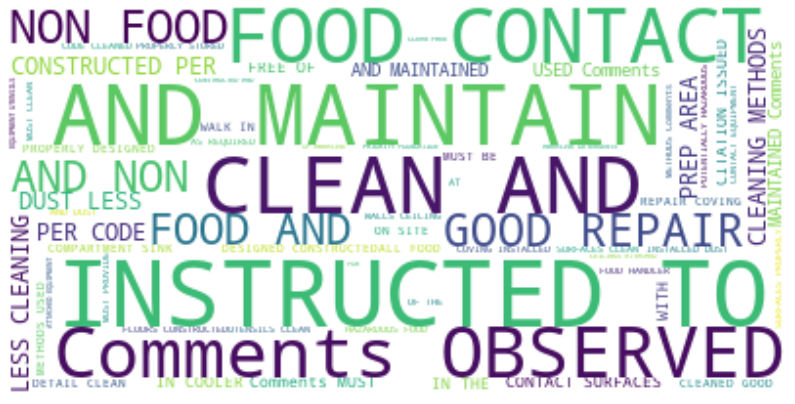

<Figure size 432x288 with 0 Axes>

In [120]:
# add the words said to stopwords
stopwords.add('Moderate risk') 
stopwords.add('risk')
stopwords.add('Moderate')
# re-generate the word cloud
wordcloud.generate(word_string)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig("Indian_Word_Cloud.png")

# 6. Modelling

In [121]:
chicago_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Day of Week
1,2373289,"CHICAGO SHARK FISH, INC","CHICAGO SHARK FISH, INC",2483042,Restaurant,Risk 2 (Medium),9800 S HALSTED ST,CHICAGO,IL,60628,2020-05-29,Canvass,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,41.715870,-87.643210,"(-87.64321013954779, 41.71587020321599)",4
3,2373225,POPEYES,POPEYES,2578260,Restaurant,Risk 2 (Medium),11350 S HALSTED ST,CHICAGO,IL,60628,2020-05-28,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.687217,-87.642365,"(-87.6423646216907, 41.687216927276424)",3
8,2371064,The Art Of Pizza Inc,The Art Of Pizza,20873,Restaurant,Risk 1 (High),3033 N ASHLAND AVE,CHICAGO,IL,60657,2020-05-26,Complaint,Pass,40. PERSONAL CLEANLINESS - Comments: OBSERVED ...,41.937006,-87.668419,"(-87.6684186143436, 41.9370063630277)",1
12,2370956,CHURCH'S CHICKEN # 483,CHURCH'S CHICKEN # 483,1273261,Restaurant,Risk 2 (Medium),1755 W JACKSON BLVD,CHICAGO,IL,60612,2020-05-21,Canvass,Pass w/ Conditions,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.877439,-87.671354,"(-87.6713535675008, 41.87743900462169)",3
14,2370931,"BIG WIG 0003, LLC",BIG WIG TACOS,2703973,Restaurant,Risk 1 (High),2490 N MILWAUKEE AVE,CHICAGO,IL,60647,2020-05-21,License,Pass,52. SEWAGE & WASTE WATER PROPERLY DISPOSED - C...,41.926526,-87.703484,"(-87.70348437837019, 41.926525863659975)",3


We Saw that most of the restaurants are inspected at the end of the week so let us employ feature binarization to set a threshold values less than fourth day.

In [124]:
chicago_df['Weekend'] = chicago_df['Day of Week'].apply(lambda x: 1 if (x>3)  else 0)
chicago_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Day of Week,Weekend
1,2373289,"CHICAGO SHARK FISH, INC","CHICAGO SHARK FISH, INC",2483042,Restaurant,Risk 2 (Medium),9800 S HALSTED ST,CHICAGO,IL,60628,2020-05-29,Canvass,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,41.715870,-87.643210,"(-87.64321013954779, 41.71587020321599)",4,1
3,2373225,POPEYES,POPEYES,2578260,Restaurant,Risk 2 (Medium),11350 S HALSTED ST,CHICAGO,IL,60628,2020-05-28,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.687217,-87.642365,"(-87.6423646216907, 41.687216927276424)",3,0
8,2371064,The Art Of Pizza Inc,The Art Of Pizza,20873,Restaurant,Risk 1 (High),3033 N ASHLAND AVE,CHICAGO,IL,60657,2020-05-26,Complaint,Pass,40. PERSONAL CLEANLINESS - Comments: OBSERVED ...,41.937006,-87.668419,"(-87.6684186143436, 41.9370063630277)",1,0
12,2370956,CHURCH'S CHICKEN # 483,CHURCH'S CHICKEN # 483,1273261,Restaurant,Risk 2 (Medium),1755 W JACKSON BLVD,CHICAGO,IL,60612,2020-05-21,Canvass,Pass w/ Conditions,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.877439,-87.671354,"(-87.6713535675008, 41.87743900462169)",3,0
14,2370931,"BIG WIG 0003, LLC",BIG WIG TACOS,2703973,Restaurant,Risk 1 (High),2490 N MILWAUKEE AVE,CHICAGO,IL,60647,2020-05-21,License,Pass,52. SEWAGE & WASTE WATER PROPERLY DISPOSED - C...,41.926526,-87.703484,"(-87.70348437837019, 41.926525863659975)",3,0


## a. One Hot Encoding

In [125]:
# Copy dataframe so that the original datframe is untouched

chicago_copy=chicago_df.copy()
chicago_copy.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Day of Week,Weekend
1,2373289,"CHICAGO SHARK FISH, INC","CHICAGO SHARK FISH, INC",2483042,Restaurant,Risk 2 (Medium),9800 S HALSTED ST,CHICAGO,IL,60628,2020-05-29,Canvass,Pass,36. THERMOMETERS PROVIDED & ACCURATE - Comment...,41.715870,-87.643210,"(-87.64321013954779, 41.71587020321599)",4,1
3,2373225,POPEYES,POPEYES,2578260,Restaurant,Risk 2 (Medium),11350 S HALSTED ST,CHICAGO,IL,60628,2020-05-28,Canvass,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.687217,-87.642365,"(-87.6423646216907, 41.687216927276424)",3,0
8,2371064,The Art Of Pizza Inc,The Art Of Pizza,20873,Restaurant,Risk 1 (High),3033 N ASHLAND AVE,CHICAGO,IL,60657,2020-05-26,Complaint,Pass,40. PERSONAL CLEANLINESS - Comments: OBSERVED ...,41.937006,-87.668419,"(-87.6684186143436, 41.9370063630277)",1,0
12,2370956,CHURCH'S CHICKEN # 483,CHURCH'S CHICKEN # 483,1273261,Restaurant,Risk 2 (Medium),1755 W JACKSON BLVD,CHICAGO,IL,60612,2020-05-21,Canvass,Pass w/ Conditions,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.877439,-87.671354,"(-87.6713535675008, 41.87743900462169)",3,0
14,2370931,"BIG WIG 0003, LLC",BIG WIG TACOS,2703973,Restaurant,Risk 1 (High),2490 N MILWAUKEE AVE,CHICAGO,IL,60647,2020-05-21,License,Pass,52. SEWAGE & WASTE WATER PROPERLY DISPOSED - C...,41.926526,-87.703484,"(-87.70348437837019, 41.926525863659975)",3,0


In [127]:
chicago_copy.corr()

,Inspection ID,License #,Zip,Latitude,Longitude,Day of Week,Weekend
Inspection ID,1.000000,0.255251,0.010330,0.039972,0.001875,0.036029,0.034193
License #,0.255251,1.000000,0.001411,-0.013343,0.037213,0.006796,0.000795
Zip,0.010330,0.001411,1.000000,0.217855,-0.439593,-0.000401,-0.001642
Latitude,0.039972,-0.013343,0.217855,1.000000,-0.399722,-0.006859,-0.006306
Longitude,0.001875,0.037213,-0.439593,-0.399722,1.000000,-0.003177,-0.003361
Day of Week,0.036029,0.006796,-0.000401,-0.006859,-0.003177,1.000000,0.698212
Weekend,0.034193,0.000795,-0.001642,-0.006306,-0.003361,0.698212,1.000000


In [130]:
chicago_2016_df=chicago_copy[chicago_copy['Inspection Date'].dt.year == 2016]
chicago_2016_df = chicago_2016_df.reset_index(drop=True)
chicago_2016_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Day of Week,Weekend
0,1978786,PHILLY'S BEST EXPRESS,PHILLY'S BEST EXPRESS,1303139,Restaurant,Risk 2 (Medium),2436 N MILWAUKEE AVE,CHICAGO,IL,60647,2016-12-29,Canvass Re-Inspection,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.925438,-87.701714,"(-87.70171444708002, 41.925437643817936)",3,0
1,1955426,YOLIS TAMALES,YOLIS TAMALES,2451484,Restaurant,Risk 1 (High),5002 S WESTERN AVE,CHICAGO,IL,60609,2016-12-28,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.802811,-87.684415,"(-87.68441497424678, 41.80281073000951)",2,0
2,1978641,ZOUP!,ZOUP!,2284380,Restaurant,Risk 1 (High),62 W ADAMS ST,CHICAGO,IL,60603,2016-12-23,Complaint,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.879534,-87.630090,"(-87.63009026893299, 41.87953373462755)",4,1
3,1978610,EFIE'S CANTEEN INC,EFIE'S CANTEEN (TAXI/LIMO AREA),29570,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666,2016-12-23,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,42.008536,-87.914428,"(-87.91442843927047, 42.008536400868735)",4,1
4,1978552,ARGO TEA CAFE-TRIBUNE TOWER,ARGO TEA,2120454,Restaurant,Risk 1 (High),435 N MICHIGAN AVE,CHICAGO,IL,60611,2016-12-22,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.890424,-87.623965,"(-87.623965477756, 41.89042415977223)",3,0


In [131]:
chicago_2016_df.shape

(12423, 19)

Let us drop the duplicates in resturant name before proceeding further.

In [133]:
chicago_2016_df.drop_duplicates(subset ="DBA Name", keep = 'first', inplace = True)
chicago_2016_df.shape

(6395, 19)

In [134]:
chicago_2016_df.sort_values(by=['DBA Name'], ascending=True)
chicago_2016_df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Day of Week,Weekend
0,1978786,PHILLY'S BEST EXPRESS,PHILLY'S BEST EXPRESS,1303139,Restaurant,Risk 2 (Medium),2436 N MILWAUKEE AVE,CHICAGO,IL,60647,2016-12-29,Canvass Re-Inspection,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.925438,-87.701714,"(-87.70171444708002, 41.925437643817936)",3,0
1,1955426,YOLIS TAMALES,YOLIS TAMALES,2451484,Restaurant,Risk 1 (High),5002 S WESTERN AVE,CHICAGO,IL,60609,2016-12-28,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.802811,-87.684415,"(-87.68441497424678, 41.80281073000951)",2,0
2,1978641,ZOUP!,ZOUP!,2284380,Restaurant,Risk 1 (High),62 W ADAMS ST,CHICAGO,IL,60603,2016-12-23,Complaint,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.879534,-87.630090,"(-87.63009026893299, 41.87953373462755)",4,1
3,1978610,EFIE'S CANTEEN INC,EFIE'S CANTEEN (TAXI/LIMO AREA),29570,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666,2016-12-23,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,42.008536,-87.914428,"(-87.91442843927047, 42.008536400868735)",4,1
4,1978552,ARGO TEA CAFE-TRIBUNE TOWER,ARGO TEA,2120454,Restaurant,Risk 1 (High),435 N MICHIGAN AVE,CHICAGO,IL,60611,2016-12-22,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.890424,-87.623965,"(-87.623965477756, 41.89042415977223)",3,0


Drop those unnecessarry columns before employing the classifier

In [137]:
# Drop columns that may not be needed

chicago_2016_df = chicago_2016_df.drop(columns=['DBA Name','Address','Zip','Inspection Date'], axis=1)
chicago_2016_df.head()

,Inspection ID,AKA Name,License #,Facility Type,Risk,City,State,Inspection Type,Results,Violations,Latitude,Longitude,Location,Day of Week,Weekend
0,1978786,PHILLY'S BEST EXPRESS,1303139,Restaurant,Risk 2 (Medium),CHICAGO,IL,Canvass Re-Inspection,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.925438,-87.701714,"(-87.70171444708002, 41.925437643817936)",3,0
1,1955426,YOLIS TAMALES,2451484,Restaurant,Risk 1 (High),CHICAGO,IL,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.802811,-87.684415,"(-87.68441497424678, 41.80281073000951)",2,0
2,1978641,ZOUP!,2284380,Restaurant,Risk 1 (High),CHICAGO,IL,Complaint,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.879534,-87.630090,"(-87.63009026893299, 41.87953373462755)",4,1
3,1978610,EFIE'S CANTEEN (TAXI/LIMO AREA),29570,Restaurant,Risk 1 (High),CHICAGO,IL,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,42.008536,-87.914428,"(-87.91442843927047, 42.008536400868735)",4,1
4,1978552,ARGO TEA,2120454,Restaurant,Risk 1 (High),CHICAGO,IL,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.890424,-87.623965,"(-87.623965477756, 41.89042415977223)",3,0


In [138]:
chicago_2016_df.shape

(6395, 15)

Let us now check the datatypes of the columns in the resultant datafarme and to check for any missing values

In [139]:
chicago_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6395 entries, 0 to 12421
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inspection ID    6395 non-null   int64  
 1   AKA Name         6395 non-null   object 
 2   License #        6395 non-null   int64  
 3   Facility Type    6395 non-null   object 
 4   Risk             6395 non-null   object 
 5   City             6395 non-null   object 
 6   State            6395 non-null   object 
 7   Inspection Type  6395 non-null   object 
 8   Results          6395 non-null   object 
 9   Violations       6395 non-null   object 
 10  Latitude         6395 non-null   float64
 11  Longitude        6395 non-null   float64
 12  Location         6395 non-null   object 
 13  Day of Week      6395 non-null   int64  
 14  Weekend          6395 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 799.4+ KB


Let us now visulize the correlation between each columns to understand their importance.

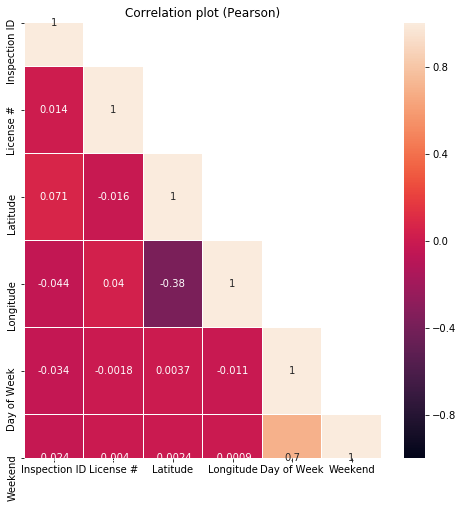

In [140]:
plt.figure(figsize = (8,8))
plt.title('Correlation plot (Pearson)')
corr = chicago_2016_df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1, mask=mask, annot=True)
plt.show()

In [141]:
# Create the X variable for train

X = chicago_2016_df.copy() #--> This is the X in train test split
X.columns

Index(['Inspection ID', 'AKA Name', 'License #', 'Facility Type', 'Risk',
       'City', 'State', 'Inspection Type', 'Results', 'Violations', 'Latitude',
       'Longitude', 'Location', 'Day of Week', 'Weekend'],
      dtype='object')

In [151]:
chicago_onehot = pd.get_dummies(chicago_2016_df[['Risk']], prefix="", prefix_sep="")


# move neighborhood column to the first column
Y = chicago_onehot


,Risk 1 (High),Risk 2 (Medium),Risk 3 (Low)
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
12401,1,0,0
12417,1,0,0
12418,1,0,0
12419,1,0,0


In [152]:
# split the df into train and test in such a way so that these two don't communicate during the training

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [153]:
print(X_train.shape), print(y_train.shape)

(4476, 15)
(4476, 3)


(None, None)

In [154]:
print(X_test.shape), print(y_test.shape)

(1919, 15)
(1919, 3)


(None, None)

# 7. Indian Restaurants in Chicago Visualization using Folium

In [159]:
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="chicago_exp")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of chicago City are 41.8755616, -87.6244212.


In [229]:
# create map of chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, restaurant, street in zip(indian_rest_df['Latitude'], indian_rest_df['Longitude'], indian_rest_df['DBA Name'], indian_rest_df['Address']):
    label = '{}, {}'.format(restaurant, street)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7, parse_html=False).add_to(map_chicago)  
    
map_chicago


# 8. Ratings of Indian Restaurants in Chicago using FourSquare API

**Using Four Square API to segment neighborhood**

In [162]:
# Define FourSquare Credentials

CLIENT_ID = 'NUXAELIQF4OROT0VOQFQSWEZCCUOD3Z5WYQ3O0ZC3KSKEGHF' # your Foursquare ID
CLIENT_SECRET = 'PP0V24MS15YDFJWLAY5O1U5S4YLA45D2SH3O1CNHJYA55VI4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

We define a getNearbyVenues get venues within a radius of 500 meter for a given latitude and longitude. Below function will return us the venue id , venue name and category.

In [187]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category','Venue ID']
    
    return(nearby_venues)

In [188]:
# Load the above result into a new data frame

chicago_venues = getNearbyVenues(names=indian_rest_df['DBA Name'],
                                   latitudes=indian_rest_df['Latitude'],
                                   longitudes=indian_rest_df['Longitude']
                                  )

KAYBEE'S INDIAN FLAVOR
POPEYES CHICKEN/INDIAN SWAAD
INDIA HOUSE
THE LITTLE INDIA
VICEROY OF INDIA/ SAGAR
VICEROY OF INDIA/ SAGAR
THE LITTLE INDIA
CHICAGO CURRY HOUSE
INDIAN GRILL
INDIAN GRILL
ESSENCE OF INDIA
RANGOLI-INDIAN CUISINE
TIKKA N CURRY
RANGOLI-INDIAN CUISINE
ESSENCE OF INDIA
PAPRIKA INDIAN RESTAURANT
THE LITTLE INDIA
ROYAL INDIAN GRILL INC.
GAYLORD INDIA RESTAURANT
SIRI INDIAN RESTAURANT
INDIA HOUSE
CHICAGO CURRY HOUSE
OBEROI'S INDIAN FOOD AND DELHI NIHARI
SIRI INDIAN RESTAURANT
SIRI INDIAN RESTAURANT
CURRY ON FIRE
ROYAL INDIAN GRILL INC.
THE LITTLE INDIA
PAPRIKA INDIAN RESTAURANT
RANGOLI-INDIAN CUISINE
ESSENCE OF INDIA
POPEYES CHICKEN/INDIAN SWAAD
ROYAL INDIAN GRILL INC.
INDIA HOUSE
INDIAN CLAY POT
OBEROI'S INDIAN FOOD AND DELHI NIHARI
POPEYES CHICKEN/INDIAN SWAAD
CURRY POINT
THE LITTLE INDIA
GAYLORD INDIA RESTAURANT
GAYLORD INDIA RESTAURANT
ESSENCE OF INDIA
OBEROI'S INDIAN FOOD AND DELHI NIHARI
GAYLORD INDIA RESTAURANT
THE LITTLE INDIA
KAYBEE'S INDIAN FLAVOR
SIRI INDIAN RES

In [189]:
chicago_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,KAYBEE'S INDIAN FLAVOR,41.904502,-87.648267,PetSmart,41.906464,-87.650007,Pet Store,509eb47872dab362eab7935a
1,KAYBEE'S INDIAN FLAVOR,41.904502,-87.648267,American Wildburger,41.904623,-87.648577,Burger Joint,54e9b528498e4b31609b8e43
2,KAYBEE'S INDIAN FLAVOR,41.904502,-87.648267,Mariano's Fresh Market,41.908090,-87.645836,Grocery Store,562fbd24498e5d6a56b25e3c
3,KAYBEE'S INDIAN FLAVOR,41.904502,-87.648267,iFLY - Chicago Lincoln Park,41.905359,-87.648417,Other Great Outdoors,56e9e5d5498eb30b276403f9
4,KAYBEE'S INDIAN FLAVOR,41.904502,-87.648267,Road Runner Sports,41.907317,-87.649923,Sporting Goods Shop,5078459ce4b03d49e3e0fbc3


In [190]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 245 uniques categories.


In [191]:
# Let's check how many venues were returned for each neighborhood

chicago_venues.groupby('Venue').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,Venue Category,Venue ID
Venue,,,,,,,
#81 Lawrence & California Bus Stop,11,11,11,11,11,11,11
11 Degrees North,13,13,13,13,13,13,13
2300 N Commonwealth Gym,8,8,8,8,8,8,8
24 Hour Gym,1,1,1,1,1,1,1
2Twenty2 Tavern,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
lowcountry,13,13,13,13,13,13,13
sbarro,5,5,5,5,5,5,5
south bound 146,10,10,10,10,10,10,10


In [192]:
chicago_venues.shape

(14338, 8)

In [193]:
chicago_venues.to_csv('chicago_venues.csv', index=False)

In [194]:
chicago_venues = pd.read_csv('chicago_venues.csv')
chicago_venues.shape

(14338, 8)

In [195]:
# work only with neighborhoods with indian restaurants

indian_rate_df=chicago_venues[chicago_venues['Venue Category'].str.contains("Indian Restaurant")]
indian_rate_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
264,THE LITTLE INDIA,41.983543,-87.658429,The Little India Restaurant,41.983638,-87.658563,Indian Restaurant,4b3c09dbf964a520cf8025e3
308,VICEROY OF INDIA/ SAGAR,41.997785,-87.693063,Udupi Palace,41.997616,-87.694064,Indian Restaurant,4aa1e192f964a520aa4120e3
309,VICEROY OF INDIA/ SAGAR,41.997785,-87.693063,Tiffin Indian Kitchen,41.997757,-87.693742,Indian Restaurant,4bd492ce7b1876b09c518986
310,VICEROY OF INDIA/ SAGAR,41.997785,-87.693063,Tahoora,41.997719,-87.689488,Indian Restaurant,4b37dedaf964a520c64725e3
311,VICEROY OF INDIA/ SAGAR,41.997785,-87.693063,Khan B.B.Q.,41.997677,-87.690153,Indian Restaurant,4b63a9f5f964a520ad8a2ae3
...,...,...,...,...,...,...,...,...
12974,THE LITTLE INDIA,41.983543,-87.658429,The Little India Restaurant,41.983638,-87.658563,Indian Restaurant,4b3c09dbf964a520cf8025e3
13029,THE LITTLE INDIA,41.983543,-87.658429,The Little India Restaurant,41.983638,-87.658563,Indian Restaurant,4b3c09dbf964a520cf8025e3
13322,MASALA,41.973420,-87.655086,Shan's Grocery & Restaurant,41.975222,-87.655122,Indian Restaurant,4ad7d628f964a520390f21e3
13565,RADHUNI INDIAN KITCHEN,41.940730,-87.651134,Khyber Pass,41.938289,-87.649281,Indian Restaurant,562987d2498e027ba6c80810


In [196]:
indian_rate_df.to_csv('indian_restaurants.csv', index=False)

In [197]:
indian_rate_df = pd.read_csv('indian_restaurants.csv')
indian_rate_df.shape

(502, 8)

Now we will define a function to get venue details like like count , rating , tip counts for a given venue id. This will be used for ranking.

In [198]:
def get_Venue_Details(venue_id):
  ratings_list = []
  
  # Create the API request URL
  url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
  # make the GET request
  results = requests.get(url).json()
  print(results)
  return(results)

Since each restaurants are assigned an unique ID, we can get useful information if we just find out the unique ID of the restaurants and then rate them.

In [199]:
id_list = indian_rate_df['Venue ID'].unique().tolist()
id_list

['4b3c09dbf964a520cf8025e3',
 '4aa1e192f964a520aa4120e3',
 '4bd492ce7b1876b09c518986',
 '4b37dedaf964a520c64725e3',
 '4b63a9f5f964a520ad8a2ae3',
 '5062656be4b0b51b64824638',
 '4abc1f19f964a520778620e3',
 '4a533e3ef964a52025b21fe3',
 '4b09dd0cf964a520d71e23e3',
 '4f5e3fbae4b026f4c7e564ca',
 '4a426e47f964a520daa51fe3',
 '4b78a5c9f964a520dedb2ee3',
 '4fdd0058e4b0ec5a8f166067',
 '4b7ca895f964a520cd9f2fe3',
 '4bf999945efe2d7f71856c34',
 '4c38f25f1e06d13a88bf783e',
 '4b8f2688f964a5204a4b33e3',
 '5d8c1e7ac918b100087ad25e',
 '4a4ea009f964a520d0ae1fe3',
 '4b7ca417f964a5200b9f2fe3',
 '562987d2498e027ba6c80810',
 '4a57d6d2f964a520e8b61fe3',
 '4b7e538af964a52096e92fe3',
 '4c3921280a71c9b62a0e42c9',
 '4e4e23c1bd4101d0d7a32838',
 '4c43b571429a0f4769d6471e',
 '59866e4616ef6757600d2419',
 '4ad7d628f964a520390f21e3',
 '50a05da3e4b0b1196a22f99b',
 '4be829676af1ef3b1b9f1b96',
 '4c25698b905a0f4739946160',
 '545dc752498ecce55b544161']

In [200]:
ratings_list=[]
def venue_ratings():
  for item in id_list:
    rating_details=get_Venue_Details(item)
    venue_data=rating_details['response']
    try:
        venue_id=venue_data['venue']['id']
        venue_name=venue_data['venue']['name']
        venue_likes=venue_data['venue']['likes']['count']
        venue_rating=venue_data['venue']['rating']
        venue_tips=venue_data['venue']['tips']['count']
        ratings_list.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
      pass
    column_names=['Venue ID','Venue Name','Venue Likes','Venue Rating','Venue Tips']
    df = pd.DataFrame(ratings_list,columns=column_names)
  return(df)

In [201]:
venue = venue_ratings()

{'meta': {'code': 200, 'requestId': '5edec8909388d7001b3f6c4e'}, 'response': {'venue': {'id': '4b3c09dbf964a520cf8025e3', 'name': 'The Little India Restaurant', 'contact': {'phone': '7737287012', 'formattedPhone': '(773) 728-7012'}, 'location': {'address': '1109 W Bryn Mawr Ave', 'crossStreet': 'at Winthrop Ave', 'lat': 41.983638275023154, 'lng': -87.65856250223774, 'labeledLatLngs': [{'label': 'display', 'lat': 41.983638275023154, 'lng': -87.65856250223774}], 'postalCode': '60660', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['1109 W Bryn Mawr Ave (at Winthrop Ave)', 'Chicago, IL 60660', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-little-india-restaurant/4b3c09dbf964a520cf8025e3', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primar

In [202]:
venue.head()

,Venue ID,Venue Name,Venue Likes,Venue Rating,Venue Tips
0,4b3c09dbf964a520cf8025e3,The Little India Restaurant,22,7.3,14
1,4aa1e192f964a520aa4120e3,Udupi Palace,36,7.7,23
2,4bd492ce7b1876b09c518986,Tiffin Indian Kitchen,45,7.6,27
3,4b37dedaf964a520c64725e3,Tahoora,49,7.8,25
4,4b63a9f5f964a520ad8a2ae3,Khan B.B.Q.,36,7.5,19


In [203]:
venue.to_csv("Indian_Restaurants_Ratings.csv", index=False)

In [204]:
rating_df = pd.read_csv("Indian_Restaurants_Ratings.csv")
rating_df

,Venue ID,Venue Name,Venue Likes,Venue Rating,Venue Tips
0,4b3c09dbf964a520cf8025e3,The Little India Restaurant,22,7.3,14
1,4aa1e192f964a520aa4120e3,Udupi Palace,36,7.7,23
2,4bd492ce7b1876b09c518986,Tiffin Indian Kitchen,45,7.6,27
3,4b37dedaf964a520c64725e3,Tahoora,49,7.8,25
4,4b63a9f5f964a520ad8a2ae3,Khan B.B.Q.,36,7.5,19
5,5062656be4b0b51b64824638,Clifton Grill,6,7.8,2
6,4abc1f19f964a520778620e3,Hema's Kitchen,41,7.2,23
7,4a533e3ef964a52025b21fe3,Mysore Woodlands,48,6.9,29
8,4b09dd0cf964a520d71e23e3,Sukhadia's,28,6.9,15
9,4f5e3fbae4b026f4c7e564ca,Pak Sweets,5,7.3,4


Thus based on the ratings received by the restaurants, India Palace is the best Indian restaurant to dine in Chicago.

In [205]:
restaurant_names = rating_df['Venue Name'].values.tolist()
restaurant_names

['The Little India Restaurant',
 'Udupi Palace',
 'Tiffin Indian Kitchen',
 'Tahoora',
 'Khan B.B.Q.',
 'Clifton Grill',
 "Hema's Kitchen",
 'Mysore Woodlands',
 "Sukhadia's",
 'Pak Sweets',
 'Uru-Swati',
 'Arya Bhavan',
 'Serena Restaurant',
 'JK Kabob House',
 'Punjabi Dhaba',
 'Annapurna',
 'India Garden',
 'Essence of India',
 'Paprika',
 'Khyber Pass',
 'Taj Mahal',
 'Ghareeb Nawaz',
 'Naan on Devon',
 'Usmania Fine Dining',
 'Hyderabad House',
 'Himalayan Restaurant',
 "Shan's Grocery & Restaurant",
 'Ghareeb Nawaz',
 'Cumin',
 'Delhi Darbar Kabab House']

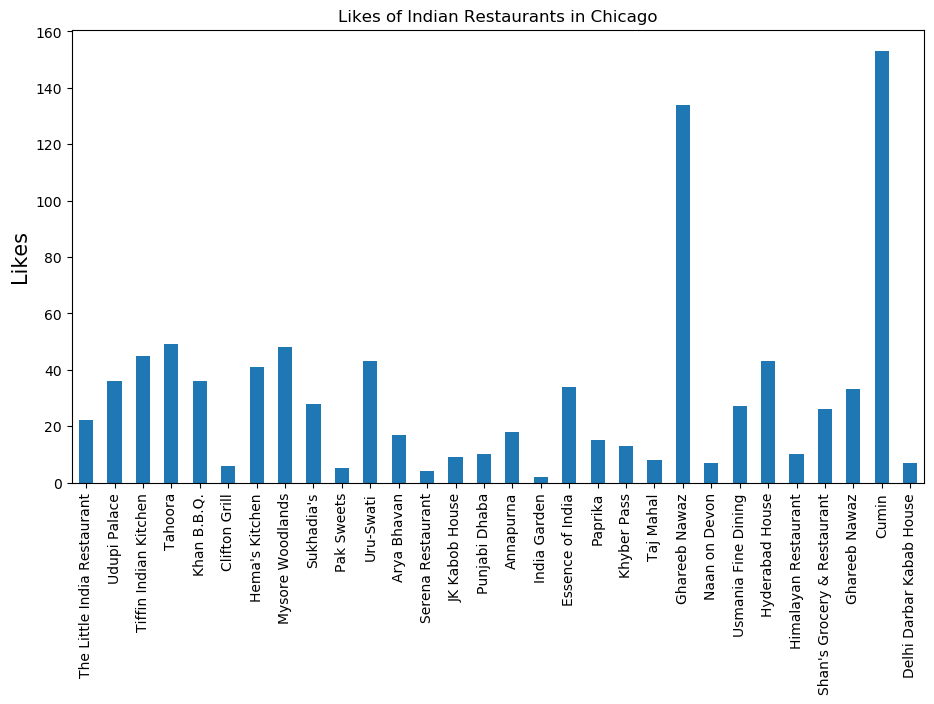

In [241]:
# Plot likes for each restaurant
plt.figure(figsize=(11,6), dpi = 100)

# title
plt.title('Likes of Indian Restaurants in Chicago')

#On y-axis
plt.ylabel('Likes', fontsize=15)

#giving a bar plot
rating_df['Venue Likes'].plot(kind='bar')

# set the locations and labels of the xticks
plt.xticks(np.arange(30), (restaurant_names))

#displays the plot
plt.show()

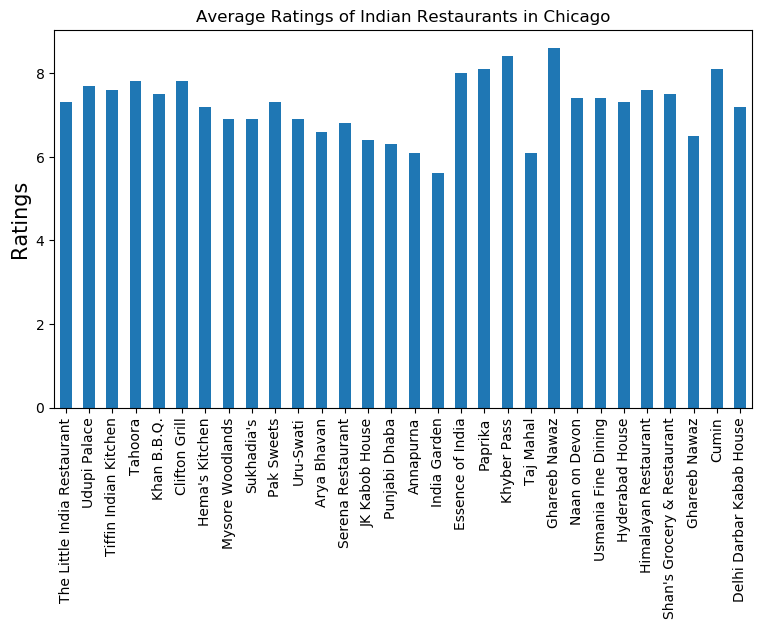

In [230]:
# Plot likes for each restaurant
plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('Average Ratings of Indian Restaurants in Chicago')

#On y-axis
plt.ylabel('Ratings', fontsize=15)

#giving a bar plot
rating_df['Venue Rating'].plot(kind='bar')

# set the locations and labels of the xticks
plt.xticks( np.arange(30), (restaurant_names) )

#displays the plot
plt.show()

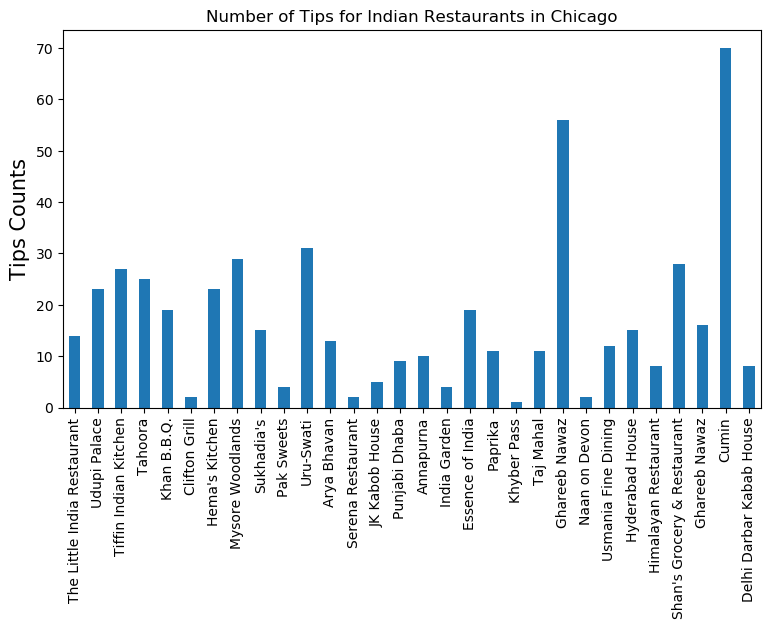

In [231]:
# Plot likes for each restaurant
plt.figure(figsize=(9,5), dpi = 100)

# title
plt.title('Number of Tips for Indian Restaurants in Chicago')

#On y-axis
plt.ylabel('Tips Counts', fontsize=15)

#giving a bar plot
rating_df['Venue Tips'].plot(kind='bar')

# set the locations and labels of the xticks
plt.xticks( np.arange(30), (restaurant_names))

#displays the plot
plt.show()

# 7. Conclusions



* Chicago has quite a few Indian restaurants. However it does have the potential market for opening a new Indian restaurant
* Roughly 80% of Indian restaurants that are currently present in Chicago are placed in high risk category based on the inspection data from 2010-2020.
* The Indian restaurants in the Chicago were visualized using the folium map rendering library
* Using Foursquare API, the venue details for the Indian restaurants were analyzed and found that among all the restaurants in Chicago - Cumin is the best place to dine.


# 8. Inspiration/Credit:  https://github.com/aravindann92/Coursera_Capstone/blob/master/Final_Capstone_Project.ipynb